<a href="https://colab.research.google.com/github/Percy-O/Email-Marketing/blob/main/email_marketing_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from plotly import express as px
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading

In [ ]:
data1 = pd.read_csv('drive/MyDrive/email_marketing/email.csv')
data2 = pd.read_csv('drive/MyDrive/email_marketing/email_link_clicked.csv')
data3 = pd.read_csv('drive/MyDrive/email_marketing/email_opened.csv')

In [ ]:
data1.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [ ]:
data2.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [ ]:
data3.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


# Data Preprocessing
* Add New columns to data2(email_opened) and data3(email_linked_clicked)
* Merge the datas together to form a whole dataframe

In [ ]:
# Adding New column (email_opened) to data2 dataframe
data2['email_opened']= 1
print(data2.head())
# Adding New column (email_link_clicked) to data3 dataframe
data3['email_link_clicked'] = 1
print(data3.head())

   email_id  email_opened
0    609056             1
1    870980             1
2    935124             1
3    158501             1
4    177561             1
   email_id  email_link_clicked
0    284534                   1
1    609056                   1
2    220820                   1
3    905936                   1
4    164034                   1


### Merging the data together

* joining the data together with a condition, stating that if the email_id on the data2 and data3 tally with the one on the data1 dataframe



In [ ]:
data = data1.merge(data2, how='left',on='email_id')
data = data.merge(data3, how='left', on='email_id')


In [ ]:
data.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,email_link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,NaN,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN,NaN


### Filling the null values with value of 0. This implies that those null values are the ones that does not tally with the email id. so therefore, the null values will be 0

In [ ]:
data = data.fillna({'email_opened': 0, 'email_link_clicked': 0})
data.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,email_link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0,0.0


## Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   email_id             100000 non-null  int64  
 1   email_text           100000 non-null  object 
 2   email_version        100000 non-null  object 
 3   hour                 100000 non-null  int64  
 4   weekday              100000 non-null  object 
 5   user_country         100000 non-null  object 
 6   user_past_purchases  100000 non-null  int64  
 7   email_opened         100000 non-null  float64
 8   email_link_clicked   100000 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 7.6+ MB


## Data Statistics

In [ ]:
data.describe()

,email_id,hour,user_past_purchases,email_opened,email_link_clicked
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,498690.196160,9.059300,3.87845,0.021190,0.103450
std,289230.727534,4.439637,3.19611,0.144018,0.304547
min,8.000000,1.000000,0.00000,0.000000,0.000000
25%,246708.250000,6.000000,1.00000,0.000000,0.000000
50%,498447.000000,9.000000,3.00000,0.000000,0.000000
75%,749942.750000,12.000000,6.00000,0.000000,0.000000
max,999998.000000,24.000000,22.00000,1.000000,1.000000


# Exploratory Data Analysis
* Data distribution on email opened
* Data distribution on email link clicked

### Data distribution on email opened

In [ ]:
email_opened = data['email_opened'][data['email_opened']== 1]
email_not_opened = data['email_opened'][data['email_opened']== 0]
data_email = {
    'Email Opened Distribution': ['Email Opened','Email Not Opened'],
    'Email Count':[len(email_opened),len(email_not_opened)]
}
fig = px.bar(data_frame=data_email,x='Email Opened Distribution',y = 'Email Count',color=['Red','Blue'],title="Data distribution on email opened")
fig.show()


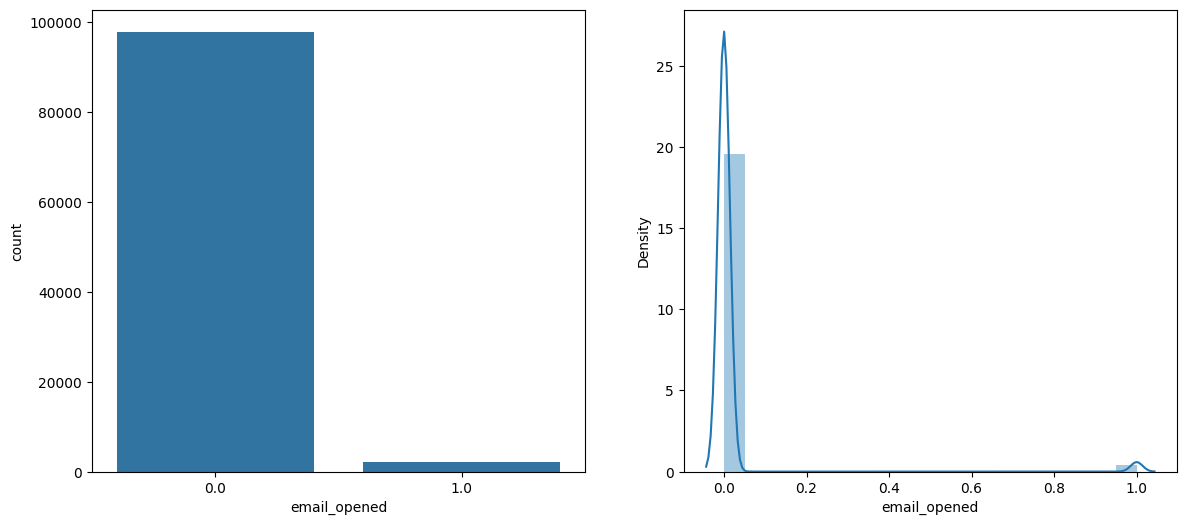

In [ ]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.countplot(x = 'email_opened', data = data)
plt.subplot(1,2,2)
sns.distplot(data["email_opened"], bins = 20)
plt.show()

### Data distribution on email link clicked

In [ ]:
email_link_opened = data['email_link_clicked'][data['email_link_clicked']== 1]
email_link_not_opened = data['email_link_clicked'][data['email_link_clicked']== 0]
data_email = {
    'Email Link Clicked Distribution': ['Email Link Clicked','Email Link Not Clicked'],
    'Email Count':[len(email_link_opened),len(email_link_not_opened)]
}
fig = px.bar(data_frame=data_email,x='Email Link Clicked Distribution',y = 'Email Count',color=['Red','Blue'],title="Data distribution on email link clicked")
fig.show()

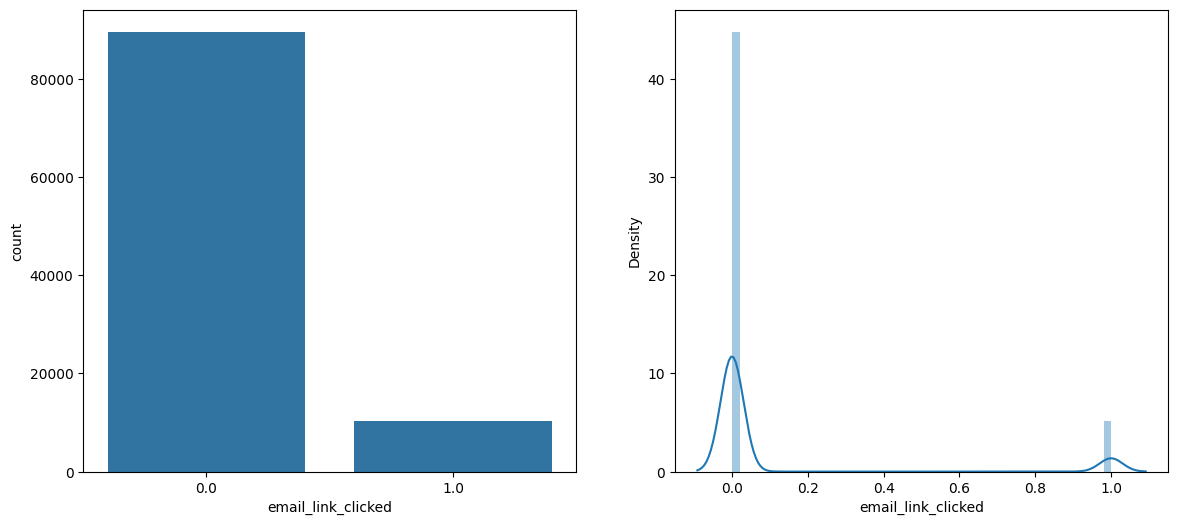

In [ ]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.countplot(x = 'email_link_clicked', data = data)
plt.subplot(1,2,2)
sns.distplot(data["email_link_clicked"],)
plt.show()

### Data visualization distribution on the target variable (Email Opened)
* Getting the permutation on the variable for both if email opened and not opened


In [ ]:
fig = px.pie(data, names='email_opened',height=400,width=600,title='Data visualization on the target variable(email_opened)')
fig.show()

In [ ]:
country=data[['email_opened', 'email_link_clicked', 'user_country']]
get_country=country.groupby('user_country').mean()
country_data=get_country.transpose()
country_data

user_country,ES,FR,UK,US
email_opened,0.008327,0.008004,0.024675,0.02436
email_link_clicked,0.039129,0.040620,0.120167,0.11902


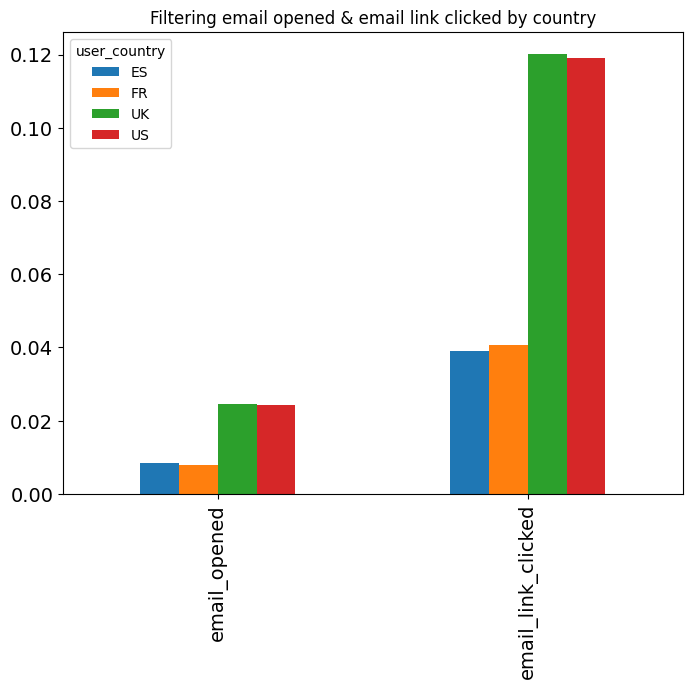

In [ ]:
c_data=country_data.plot(kind='bar',
                  title='Filtering email opened & email link clicked by country',
                  figsize=(8,6),
                  legend=True,
                  fontsize=14)


In [ ]:
weekday=data[['email_opened', 'email_link_clicked', 'weekday']]
get_weekday=weekday.groupby('weekday').mean()
weekday_data=get_weekday.transpose()
weekday_data

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
email_opened,0.014037,0.022906,0.017846,0.016751,0.024445,0.024889,0.027620
email_link_clicked,0.074134,0.116062,0.087652,0.087649,0.118442,0.120484,0.120278


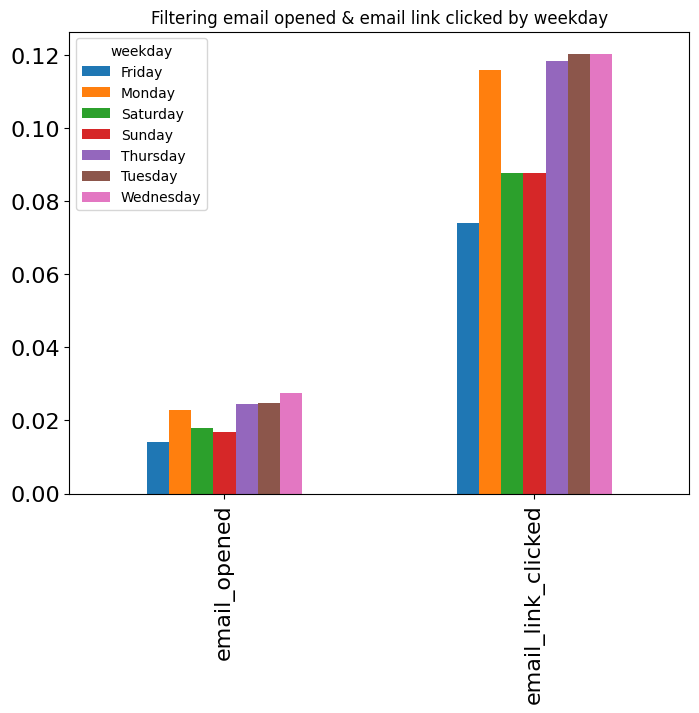

In [ ]:
w_data=weekday_data.plot(kind='bar',
                         title='Filtering email opened & email link clicked by weekday',
                         figsize=(8,6),
                         legend=True,
                         fontsize=16)


## Checking different instances to why the email is not opened and the link not clicked

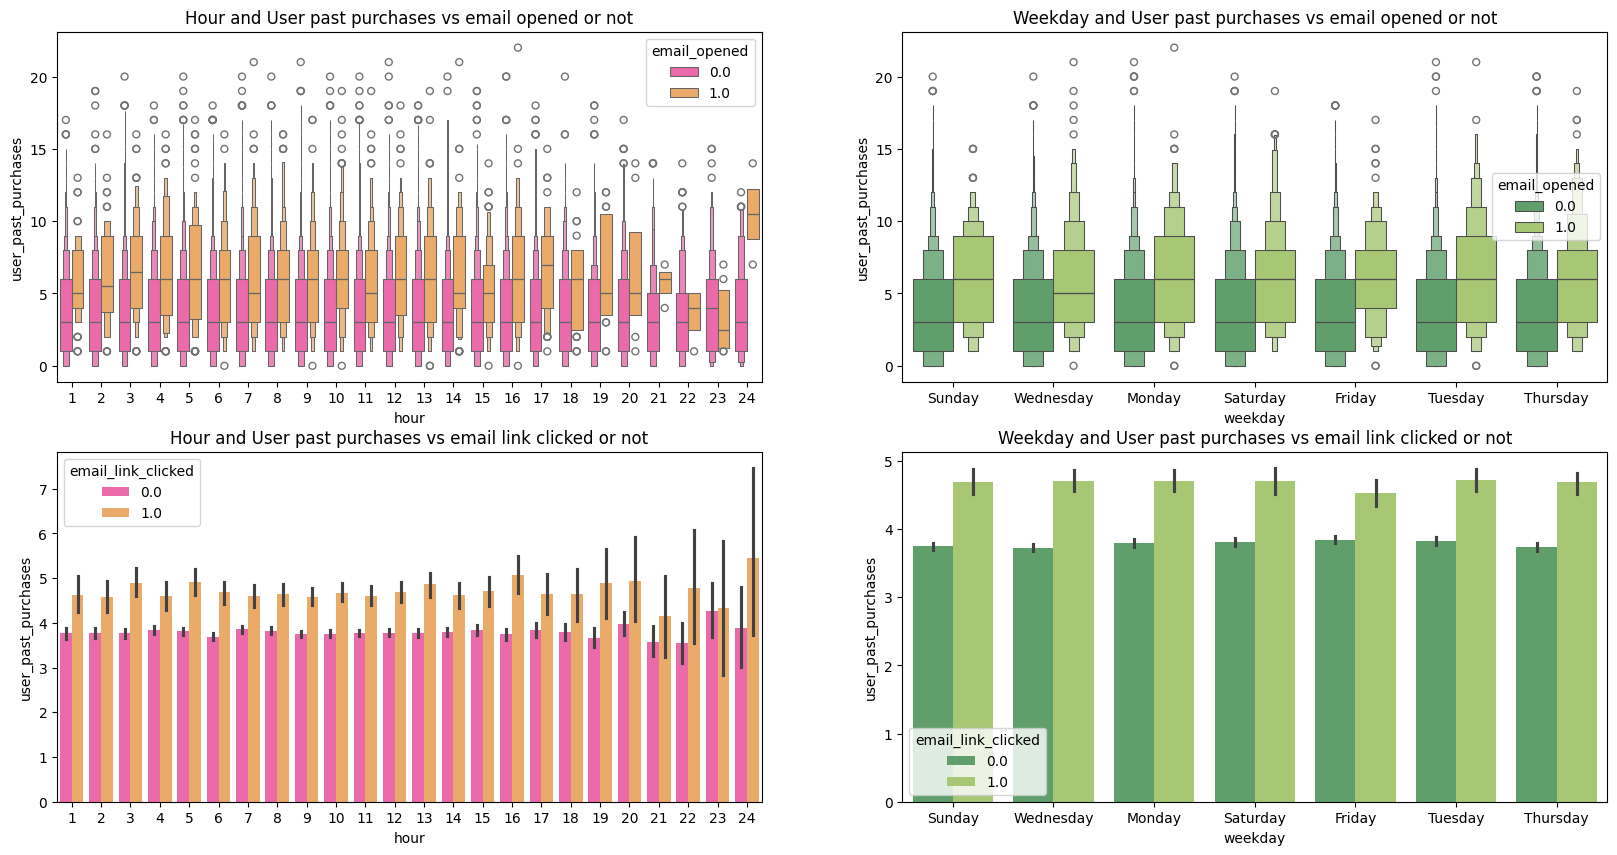

In [ ]:
f,ax=plt.subplots(2,2, figsize=(20,10))

sns.boxenplot(x= "hour",y="user_past_purchases", hue= "email_opened", data=data,ax=ax[0,0],palette="spring")
ax[0,0].set_title('Hour and User past purchases vs email opened or not')

sns.boxenplot(x="weekday",y="user_past_purchases", hue="email_opened", data=data,ax=ax[0,1],palette="summer")
ax[0,1].set_title('Weekday and User past purchases vs email opened or not')

sns.barplot(x= "hour",y="user_past_purchases", hue= "email_link_clicked", data=data,ax=ax[1,0],palette="spring")
ax[1,0].set_title('Hour and User past purchases vs email link clicked or not')

sns.barplot(x="weekday",y="user_past_purchases", hue="email_link_clicked", data=data,ax=ax[1,1],palette="summer")
ax[1,1].set_title('Weekday and User past purchases vs email link clicked or not')
plt.show()

## Encoding the categorical variable

* Using onehotencoder



In [ ]:
from sklearn.preprocessing import OneHotEncoder
cols = ['email_text', 'email_version', 'user_country', 'weekday']

# Instantiate the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the selected columns
encoded_cols = pd.DataFrame(encoder.fit_transform(data[cols]), columns=encoder.get_feature_names_out(cols))

# Concatenate the encoded columns with the original DataFrame
new_data = pd.concat([data, encoded_cols], axis=1)

# Drop the original categorical columns if needed
new_data.drop(columns=cols, inplace=True)

# Display the resulting DataFrame
new_data.head()

,email_id,hour,user_past_purchases,email_opened,email_link_clicked,email_text_short_email,email_version_personalized,user_country_FR,user_country_UK,user_country_US,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,85120,2,5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,966622,12,2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,777221,11,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,493711,6,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,106887,14,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# Data Splitting

In [ ]:
X = new_data.drop('email_opened',axis=1)
Y= new_data['email_opened']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
print(X_train.shape,' - ', X_test.shape ,'\n' ,y_train.shape,' - ', y_test.shape)


(75000, 15)  -  (25000, 15) 
 (75000,)  -  (25000,)


# Model Evaluation

In [ ]:
from sklearn.metrics import f1_score, precision_score,recall_score, accuracy_score, classification_report, confusion_matrix
def model_evaluation(y_pred,y_test):
  a_score = accuracy_score(y_pred,y_test)
  c_report = classification_report(y_pred,y_test)

  print(f'Accuracy Score - {a_score}')
  print(f'Classification Report - \n {c_report}')

  conf_mat = confusion_matrix(y_pred,y_test)
  sns.set_style(style='white')
  plt.figure(figsize=(12,8))
  heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":20},cmap='Spectral')
  heatmap.set_title('Confusion Matrix Heatmap for \n email marketing', fontdict={'fontsize':15}, pad=12)
  heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
  heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
  heatmap.set_xticklabels(['NO','YES'], fontdict={'fontsize':12})
  heatmap.set_yticklabels(['NO','YES'], fontdict={'fontsize':12})
  plt.show()

#Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

Accuracy Score - 0.97624
Classification Report - 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     24859
         1.0       0.09      0.37      0.15       141

    accuracy                           0.98     25000
   macro avg       0.54      0.67      0.57     25000
weighted avg       0.99      0.98      0.98     25000



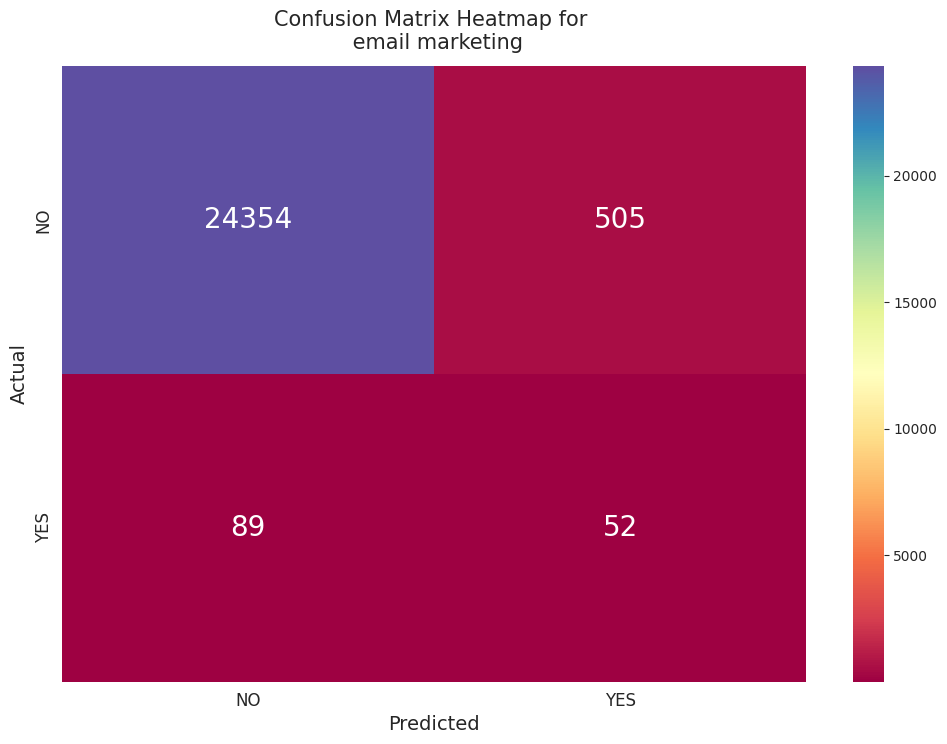

In [ ]:
y_pred = rf.predict(X_test)
model_evaluation(y_pred,y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

Accuracy Score - 0.96648
Classification Report - 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     24435
         1.0       0.25      0.25      0.25       565

    accuracy                           0.97     25000
   macro avg       0.62      0.62      0.62     25000
weighted avg       0.97      0.97      0.97     25000



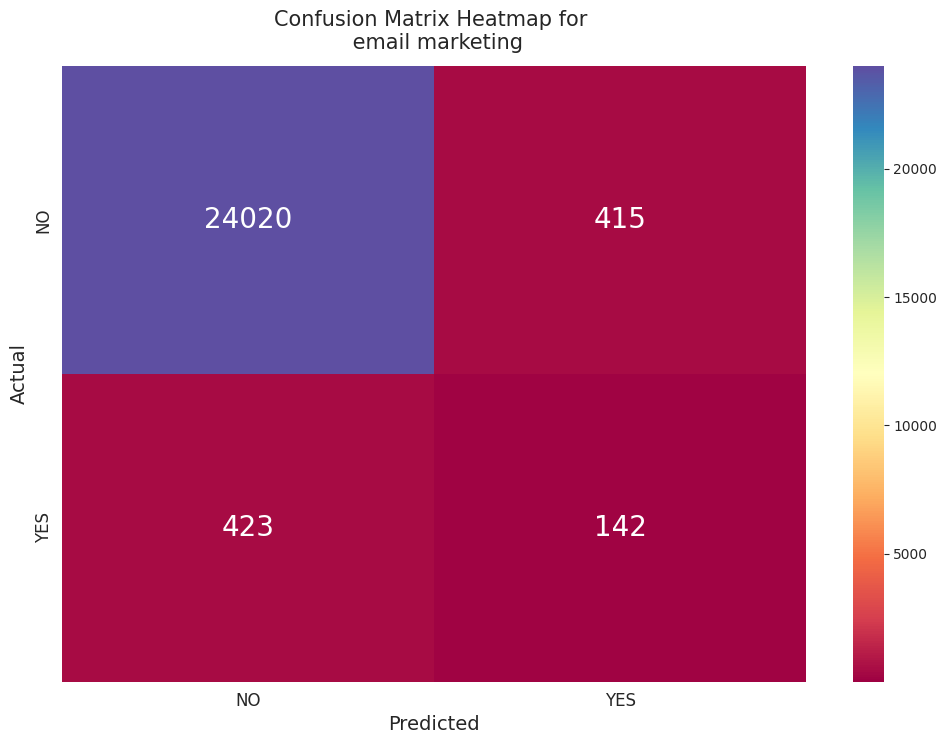

In [ ]:
y_pred = dt.predict(X_test)
model_evaluation(y_pred,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Accuracy Score - 0.97772
Classification Report - 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     25000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.98     25000
   macro avg       0.50      0.49      0.49     25000
weighted avg       1.00      0.98      0.99     25000



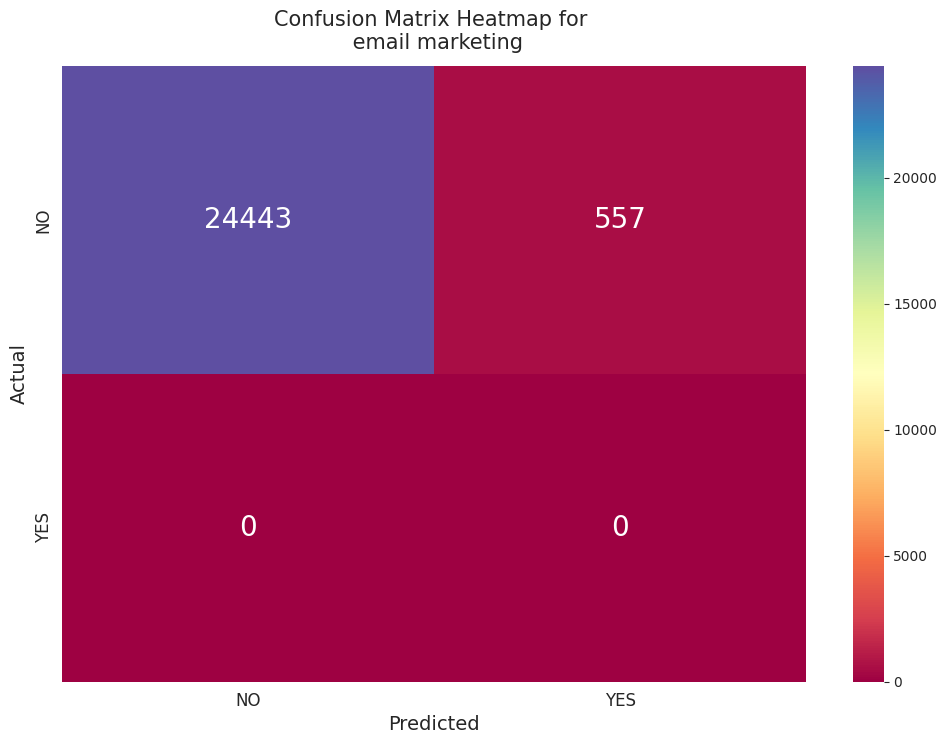

In [ ]:
y_pred = lr.predict(X_test)
model_evaluation(y_pred,y_test)

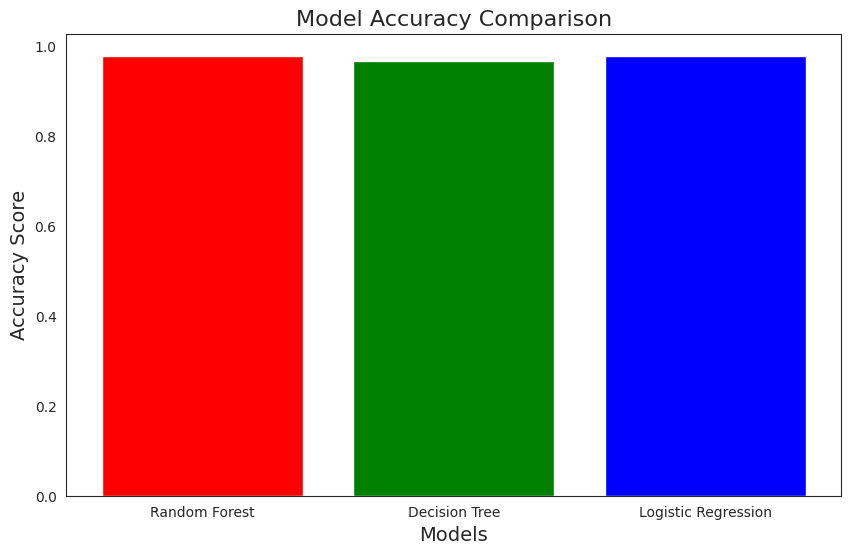

In [ ]:
# prompt: plot bar char theat display the accuracy score for the three model tested

import matplotlib.pyplot as plt
models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
scores = [accuracy_score(y_test, rf.predict(X_test)), accuracy_score(y_test, dt.predict(X_test)), accuracy_score(y_test, lr.predict(X_test))]

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['red', 'green', 'blue'])
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.show()


# Prediction

In [ ]:
# Create a DataFrame from the new data
predict_data = pd.DataFrame({
    'email_text': ['short_email','long_email'],
    'email_version': ['personalized','personalized'],
    'user_country': ['UK','US'],
    'weekday': ['Saturday','Monday'],
    'hour': [2,4],
    'user_past_purchases': [5,10],
    'email_link_clicked': [0,1],
    'email_id': [85120,80531]
})
# predict_data = data.drop('email_opened',axis=1)

# Apply one-hot encoding to the categorical columns
encoded_predict_data = pd.DataFrame(encoder.transform(
    predict_data[['email_text', 'email_version', 'user_country', 'weekday']]),
    columns=encoder.get_feature_names_out(['email_text', 'email_version', 'user_country', 'weekday']))

# Concatenate the encoded features with the numerical features
final_predict_data = pd.concat(
    [predict_data[['email_id','hour', 'user_past_purchases', 'email_link_clicked']],
     encoded_predict_data], axis=1)
# Make predictions using the Random Forest model
predictions = rf.predict(final_predict_data)

# Print the predictions
for predictions in predictions:
  print(predictions)
  if predictions == 1:
    print('There\'s tendcy that the user can open the email ')
  else:
    print('The user cannot open the email')

0.0
The user cannot open the email
1.0
There's tendcy that the user can open the email 


## Using Exported model for prediction
* Joblib

In [ ]:
import joblib

joblib.dump(rf,'model.pkl')
joblib.dump(encoder,'encoder.joblib')
model = joblib.load('model.pkl')


# Create a DataFrame from the new data
predict_data = pd.DataFrame({
    'email_text': ['short_email','long_email'],
    'email_version': ['personalized','personalized'],
    'user_country': ['UK','US'],
    'weekday': ['Saturday','Monday'],
    'hour': [2,4],
    'user_past_purchases': [5,10],
    'email_link_clicked': [0,1],
    'email_id': [85120,80531]
})
# predict_data = data.drop('email_opened',axis=1)

# Apply one-hot encoding to the categorical columns
encoded_predict_data = pd.DataFrame(encoder.transform(
    predict_data[['email_text', 'email_version', 'user_country', 'weekday']]),
    columns=encoder.get_feature_names_out(['email_text', 'email_version', 'user_country', 'weekday']))

# Concatenate the encoded features with the numerical features
final_predict_data = pd.concat(
    [predict_data[['email_id','hour', 'user_past_purchases', 'email_link_clicked']],
     encoded_predict_data], axis=1)
# Make predictions using the Random Forest model
predictions = model.predict(final_predict_data)

# Print the predictions
for predictions in predictions:
  print(predictions)
  if predictions == 1:
    print('There\'s tendcy that the user can open the email ')
  else:
    print('The user cannot open the email')

0.0
The user cannot open the email
1.0
There's tendcy that the user can open the email 
